In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import  category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from category_encoders import *
import  numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [22]:
dataset = pd.read_csv("~/Desktop/DataDump/Flights_TRAIN.csv")
dataset.isnull().sum()
dataset = dataset.dropna()
dataset = dataset.sample(frac=0.1, random_state = 1234).reset_index(drop=True)


In [23]:
#Picking the best features from carrier, origin and destination dummies using MSE

In [27]:
X_Temp = pd.get_dummies(dataset[["origin","dest", "op_unique_carrier"]])
y = dataset["arr_delay"]
reg = LinearRegression()

In [9]:
min_features_to_select = 10  # Minimum number of features to consider
rfecv = RFECV(
    estimator=reg,
    step=1,
    scoring="neg_mean_absolute_error",
    cv=StratifiedKFold(2),
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_Temp, y)

/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LinearRegression(), min_features_to_select=10,
      scoring='neg_mean_absolute_error')

In [14]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 24


/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


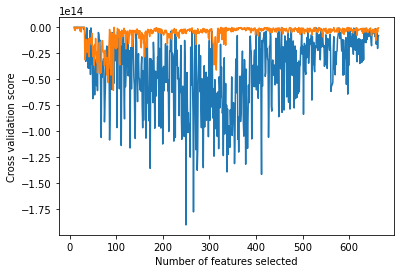

In [15]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [35]:
cols_X = ['dep_dayofweek','arr_Fog', 'arr_Snow', 'arr_Cold', 'arr_Storm', 'arr_Hail',
          'arr_Precipitation', 'crs_dep_time', 'crs_arr_time',
          'flights_origin', 'flights_dest']

In [36]:
X = dataset[cols_X]
X = pd.concat([X,X_Temp[X_Temp.columns[rfecv.support_]]], axis=1)
y = dataset["arr_delay"]
X.head()

,dep_dayofweek,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,crs_dep_time,crs_arr_time,flights_origin,...,dest_PIB,dest_RDD,dest_SAF,dest_SFO,dest_SPS,dest_UIN,dest_VEL,dest_VLD,dest_VPS,dest_WRG
0,0,1.0,3.0,0.0,0.0,0.0,0.0,1135,1355,250,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,3.0,0.0,0.0,0.0,0.0,955,1340,90,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0,3.0,0.0,0.0,0.0,0.0,1710,2235,78,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,3.0,0.0,0.0,0.0,0.0,1439,1654,68,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1.0,0.0,0.0,0.0,0.0,1810,1929,6,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [38]:
# X_train = X_train.reset_index(drop=True)     
# y_train = y_train.reset_index(drop=True)

In [39]:
#encoder = TargetEncoder(cols=cols_to_encode)

In [40]:
#X_train_fitted = X_train.iloc[0:0,:]

In [41]:
# X_train_fitted

In [42]:
# kf = KFold(n_splits = 4, shuffle = False)
# for tr_ind, val_ind in kf.split(X_train, y_train):
#     encoder.fit(X_train.loc[tr_ind], y_train.loc[tr_ind])
#     X_train_fitted = X_train_fitted.append(encoder.transform(X_train.loc[val_ind]))

In [44]:
# encoder.fit(X_train, y_train)
# X_test = encoder.transform(X_test)
# X_train = encoder.transform(X_test)

In [41]:
X_train

,dep_dayofweek,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,crs_dep_time,crs_arr_time,flights_origin,...,dest_PIB,dest_RDD,dest_SAF,dest_SFO,dest_SPS,dest_UIN,dest_VEL,dest_VLD,dest_VPS,dest_WRG
11051,4,1.0,3.0,0.0,0.0,0.0,0.0,600,1345,78,...,0,0,0,0,0,0,0,0,0,0
10802,3,1.0,3.0,0.0,0.0,0.0,0.0,2119,2324,221,...,0,0,0,0,0,0,0,0,0,0
2723,5,1.0,3.0,0.0,0.0,0.0,0.0,930,1314,88,...,0,0,0,0,0,0,0,0,0,0
13095,5,1.0,3.0,0.0,0.0,0.0,0.0,1059,1233,61,...,0,0,0,0,0,0,0,0,0,0
13846,5,1.0,3.0,0.0,0.0,0.0,0.0,2054,2325,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,5,1.0,3.0,0.0,0.0,0.0,0.0,2015,2300,20,...,0,0,0,0,0,0,0,0,0,0
7221,4,1.0,3.0,0.0,0.0,0.0,0.0,950,1244,189,...,0,0,0,0,0,0,0,0,0,0
1318,1,1.0,3.0,0.0,0.0,0.0,0.0,1114,1424,38,...,0,0,0,0,0,0,0,0,0,0
8915,3,1.0,3.0,0.0,0.0,0.0,0.0,1930,2233,21,...,0,0,0,1,0,0,0,0,0,0


In [48]:
mod = RandomForestRegressor()

In [46]:
X_train

,dep_dayofweek,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,crs_dep_time,crs_arr_time,flights_origin,...,dest_PIB,dest_RDD,dest_SAF,dest_SFO,dest_SPS,dest_UIN,dest_VEL,dest_VLD,dest_VPS,dest_WRG
11051,4,1.0,3.0,0.0,0.0,0.0,0.0,600,1345,78,...,0,0,0,0,0,0,0,0,0,0
10802,3,1.0,3.0,0.0,0.0,0.0,0.0,2119,2324,221,...,0,0,0,0,0,0,0,0,0,0
2723,5,1.0,3.0,0.0,0.0,0.0,0.0,930,1314,88,...,0,0,0,0,0,0,0,0,0,0
13095,5,1.0,3.0,0.0,0.0,0.0,0.0,1059,1233,61,...,0,0,0,0,0,0,0,0,0,0
13846,5,1.0,3.0,0.0,0.0,0.0,0.0,2054,2325,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,5,1.0,3.0,0.0,0.0,0.0,0.0,2015,2300,20,...,0,0,0,0,0,0,0,0,0,0
7221,4,1.0,3.0,0.0,0.0,0.0,0.0,950,1244,189,...,0,0,0,0,0,0,0,0,0,0
1318,1,1.0,3.0,0.0,0.0,0.0,0.0,1114,1424,38,...,0,0,0,0,0,0,0,0,0,0
8915,3,1.0,3.0,0.0,0.0,0.0,0.0,1930,2233,21,...,0,0,0,1,0,0,0,0,0,0


#### Baseline

In [49]:
mod.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
mod.score(X_train,y_train)

0.8530169998460762

In [53]:
print(f"R2: {mod.score(X_test,y_test)}")
y_pred = mod.predict(X_test)
print(f"MSE: {metrics.mean_squared_error(y_test,y_pred)}")

R2: 0.02363267424475246
MSE: 2342.8232425065053


#### Feature elimination

In [56]:
min_features_to_select = 8  # Minimum number of features to consider
rfecv = RFECV(
    estimator=mod,
    step=1,
    scoring="r2",
    cv=StratifiedKFold(2),
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(), min_features_to_select=8,
      scoring='r2')

In [57]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 35


/home/joaolrossi/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


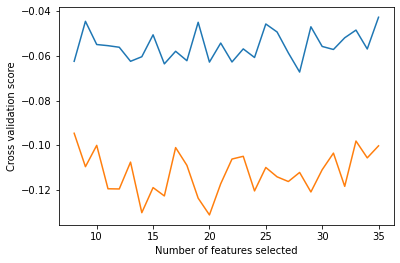

In [58]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [59]:
params = {'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [60]:
param_comb = 2

In [61]:
mod = RandomForestRegressor()

In [62]:
random_search = RandomizedSearchCV(mod, param_distributions=params, n_iter=param_comb, n_jobs=-1, verbose=3, random_state=0, cv = kf.split(X_train, y_train))
random_search.fit(X_train_fitted, y_train)
print(random_search.best_score_)

NameError: name 'kf' is not defined

In [63]:
best_est = random_search.best_estimator_
#best_est.fit(X_train_fitted,y_train)

NameError: name 'random_search' is not defined

In [64]:
print(f"R2: {best_est.score(X_test_fitted,y_test)}")
y_pred = best_est.predict(X_test_fitted)
print(f"MSE: {metrics.mean_squared_error(y_test,y_pred)}")

NameError: name 'best_est' is not defined